
# **Covid-19 Diagnosis from CT Lung Images**

The dataset utilized in this research project
encompasses 2482 CT lung images specifically related to
SARS-CoV-2. It comprises 1252 CT scans derived from
individuals confirmed positive for SARS-CoV-2 infection
(COVID-19) and an additional 1230 CT scans from
patients devoid of the viral infection.

In recent years, deep learning, specifically convolutional neural networks (CNNs), has demonstrated noteworthy efficacy. CNNs have exhibited remarkable capabilities in the realm of COVID-19 detection from chest CT images.Through meticulous image pre-processing, detailed model fitting, and optimization, substantial advancements in outcomes can be realized.

The overarching objective of this project is to develop
a robust convolutional neural network model tailored
for the purpose of distinguishing patients diagnosed
with COVID-19 and those who were not infected by the
SARS-CoV-2 virus.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
from tensorflow.keras.utils import plot_model
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, accuracy_score, confusion_matrix
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator


In [ ]:
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))

def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation = cv2.INTER_AREA)

In [ ]:
disease_types=['COVID', 'non-COVID']
data_dir = '/content/drive/MyDrive/covid_dataset2'
train_dir = os.path.join(data_dir)

In [ ]:
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head()

,File,DiseaseID,Disease Type
0,COVID/Covid (1224).png,0,COVID
1,COVID/Covid (1226).png,0,COVID
2,COVID/Covid (1214).png,0,COVID
3,COVID/Covid (1217).png,0,COVID
4,COVID/Covid (1222).png,0,COVID


Τυχαία σειρά του συνόλου εκπαίδευσης

In [ ]:
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train)) # Reset indices
train.head()

,File,DiseaseID,Disease Type
0,COVID/Covid (319).png,0,COVID
1,COVID/Covid (643).png,0,COVID
2,non-COVID/Non-Covid (519).png,1,non-COVID
3,non-COVID/Non-Covid (58).png,1,non-COVID
4,COVID/Covid (836).png,0,COVID


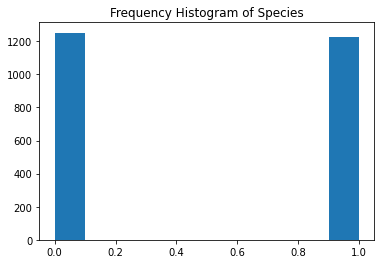

<Figure size 864x864 with 0 Axes>

In [ ]:
plt.hist(train['DiseaseID'])
plt.title('Frequency Histogram of Species')
plt.figure(figsize=(12, 12))
plt.show()

Παρουσίαση εικόνων COVID

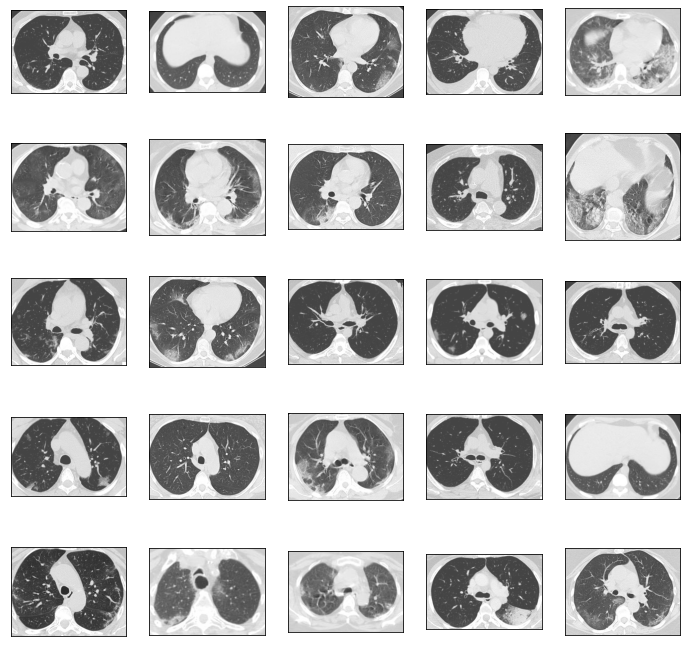

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('COVID', 5, 5)

Παρουσίαση εικόνων non-COVID

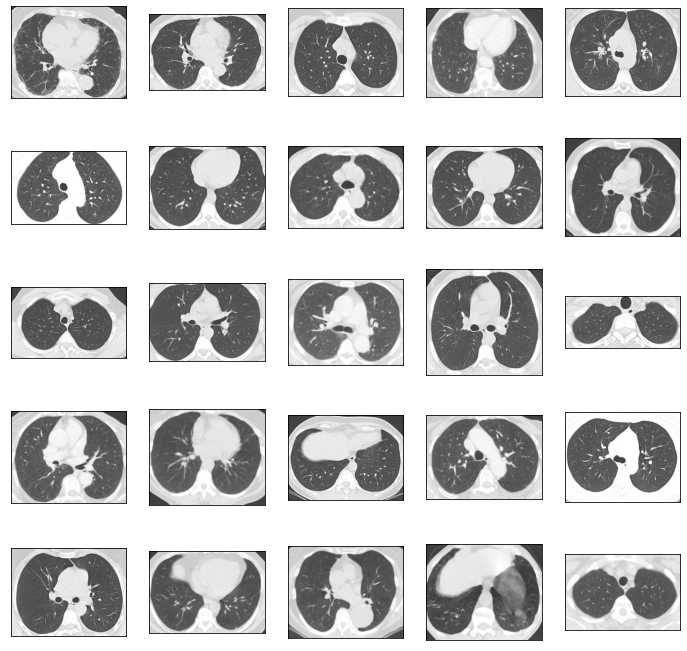

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('non-COVID', 5, 5)

Image Read and Resize Function

In [ ]:
IMAGE_SIZE = 64
X = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values), total = len(train)):
    image = read_image(file)
    if image is not None:
        X[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
X /= 255.
y = train['DiseaseID'].values
print(X.shape)
print(y.shape)

  0%|          | 0/2481 [00:00<?, ?it/s]

(2481, 64, 64, 3)
(2481,)


Train Test Splitting

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state = SEED)

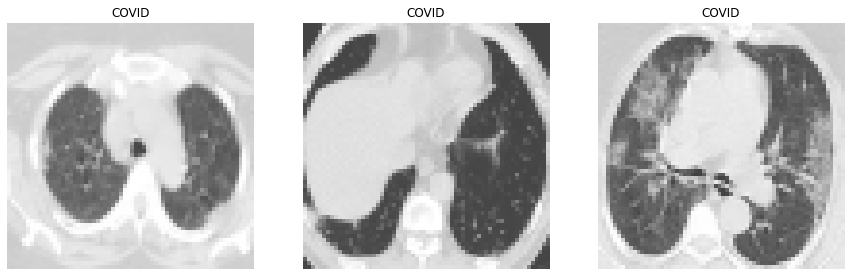

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(disease_types[np.argmax(Y_train[i])])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(528, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 256)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       5

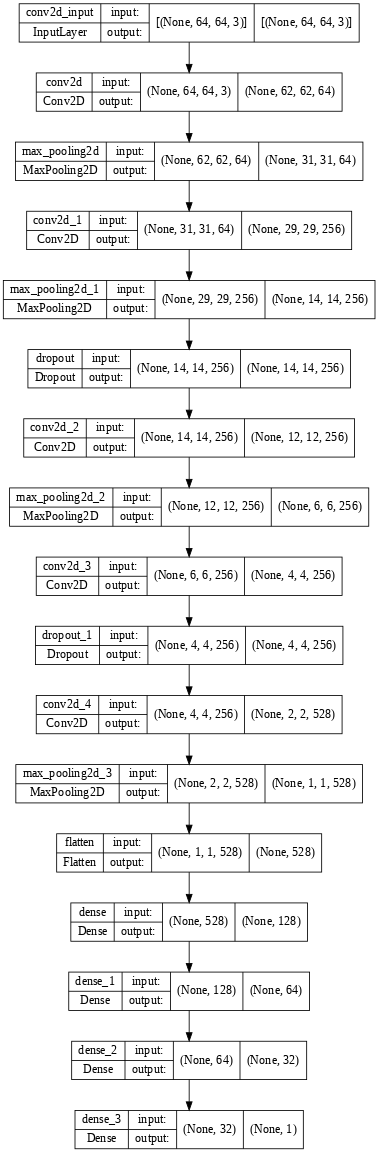

In [ ]:
plot_model(model,
           show_shapes = True,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 60)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=64, epochs=30,
                    verbose=1,validation_split=0.1)

Epoch 1/30
28/28 [==============================] - 13s 62ms/step - loss: 0.8798 - accuracy: 0.4880 - val_loss: 0.6933 - val_accuracy: 0.4925
Epoch 2/30
28/28 [==============================] - 1s 30ms/step - loss: 0.6966 - accuracy: 0.5053 - val_loss: 0.6929 - val_accuracy: 0.5628
Epoch 3/30
28/28 [==============================] - 1s 30ms/step - loss: 0.6923 - accuracy: 0.5277 - val_loss: 0.7573 - val_accuracy: 0.5075
Epoch 4/30
28/28 [==============================] - 1s 30ms/step - loss: 0.6885 - accuracy: 0.5955 - val_loss: 0.6097 - val_accuracy: 0.6985
Epoch 5/30
28/28 [==============================] - 1s 31ms/step - loss: 0.6648 - accuracy: 0.6353 - val_loss: 0.6006 - val_accuracy: 0.7035
Epoch 6/30
28/28 [==============================] - 1s 30ms/step - loss: 0.6004 - accuracy: 0.6751 - val_loss: 0.5402 - val_accuracy: 0.7186
Epoch 7/30
28/28 [==============================] - 1s 31ms/step - loss: 0.6273 - accuracy: 0.6863 - val_loss: 0.5894 - val_accuracy: 0.7186
Epoch 8/30
2

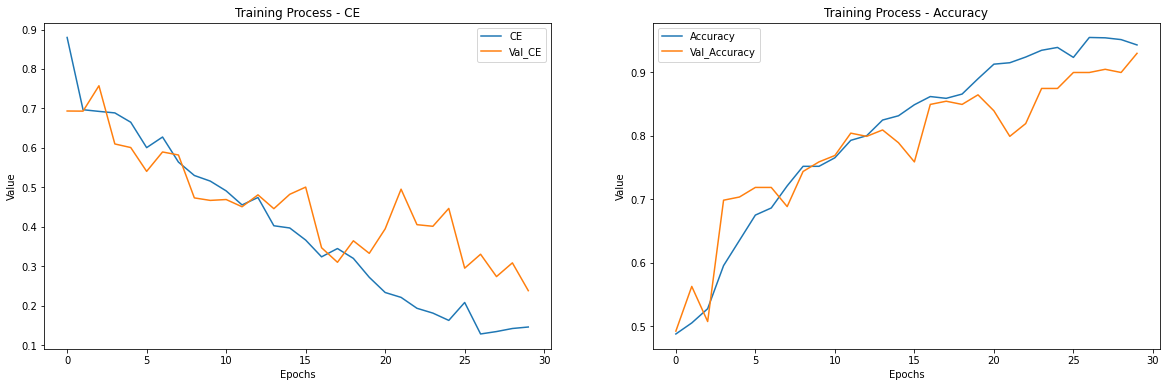

In [ ]:

fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(20,6))


axis[0].plot(history.epoch, history.history['loss'])
axis[0].plot(history.epoch, history.history['val_loss'])
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Value")
axis[0].legend(["CE", "Val_CE"])
axis[0].set_title("Training Process - CE")

axis[1].plot(history.epoch, history.history['accuracy'])
axis[1].plot(history.epoch, history.history['val_accuracy'])
axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Value")
axis[1].legend(["Accuracy", "Val_Accuracy"])
axis[1].set_title("Training Process - Accuracy")
plt.show()


In [ ]:
final_loss, final_accuracy = model.evaluate(X_test, Y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

16/16 [==============================] - 0s 16ms/step - loss: 0.3835 - accuracy: 0.8853
Final Loss: 0.3834879398345947, Final Accuracy: 0.8853118419647217


The confusion matrix of the classification is: 
Predicted    0  All
Actual             
0          251  251
1          246  246
All        497  497
----------------------------------------------------------------------------------------------------


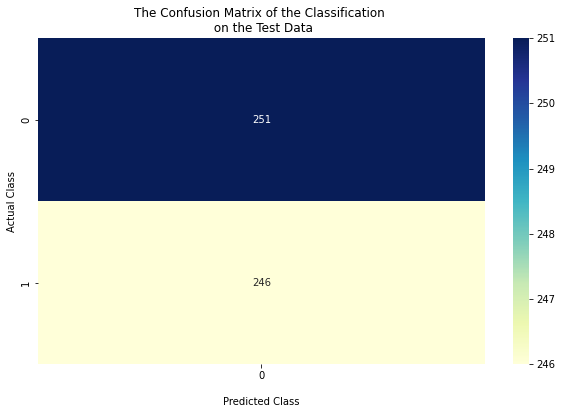

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

predictions_nn_probs = model.predict(X_test)


predictions_nn = np.argmax(predictions_nn_probs, axis=1)


df = pd.DataFrame({"Y_Actual": Y_test,
                  "Y_Predicted": predictions_nn
                  }
                 )

conf_mat = pd.crosstab(df["Y_Actual"],
                       df["Y_Predicted"],
                       rownames=["Actual"],
                       colnames=["Predicted"],
                       margins=True
                      )

print(f"The confusion matrix of the classification is: \n{conf_mat}")
print("-"*100)

conf_mat = conf_mat.drop("All", axis=0)
conf_mat = conf_mat.drop("All", axis=1)


f, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.heatmap(conf_mat,
            annot=True,
            fmt="d",
            cmap="YlGnBu",
            ax=axis
            )
axis.set_xlabel("\nPredicted Class")
axis.set_ylabel("Actual Class")
axis.set_title("The Confusion Matrix of the Classification \n on the Test Data")

plt.show()

# **Conclusions**

It was noted that, at the 50-epoch mark, the model began to exhibit signs of overfitting. Furthermore, in contrast to other pretrained models, it did not manifest equally precise results. However, this divergence can be reasonably rationalized, given that the majority of pretrained models incorporate approximately 25 million parameters or more, whereas the aforementioned model comprises approximately 2.5 million parameters.